# Bayesian Networks - Learning from Data

## Basic independence patterns: chain, fork, collider

Three elementary patterns appear repeatedly in Bayesian networks:

### Chain (serial connection)

$$
A \to B \to C
$$

- $A$ and $C$ are independent if $B$ is observed (i.e. given):
  $$
  A \perp C \mid B = b.
  $$
- If $B$ is _not_ observed, $A$ and $C$ depend on each other through $B$

More generally, in a serial connection, **given the middle node**, variables on either side are independent.

---

### Fork (diverging connection)

$$
B \to A, \qquad B \to C
$$

(often drawn as $A \leftarrow B \to C$)

- If $B$ is _not_ observed, $A$ and $C$ are generally **dependent** (share a common cause $B$).
- If $B$: is observed $A$ and $C$ become **independent**:
  $$
  A \perp C \mid B = b.
  $$

This is the standard **common cause** situation: once we know the cause, observing one effect does not change our belief
about the other effect.

---

### Collider (converging connection)

$$
A \to B \leftarrow C
$$

- If $B$ is _not_ observed: $A$ and $C$ are typically **independent**.
- If $B$ is observed (or on any descendant of $B$): $A$ and $C$ become **dependent**.

This is the phenomenon of **explaining away**:

- If $B$ is observed, then learning that $A$ happened makes $C$ less likely, and vice versa, because they are competing
  explanations for $B$.

This behaviour is the opposite of chains and forks, where conditioning on the middle node **blocks** dependence; in a
collider, conditioning on the middle node **creates** dependence.

## Conditional independence patterns in a larger network

The slides use a **cyanobacteria** example with variables:

- $T$: temperature,
- $F$: fertilizer in water,
- $C$: cyanobacteria present,
- $M$: fish mortality,
- $W$: water color.

Graph (informally):

- $T \to C \leftarrow F$,
- $C \to M$,
- $C \to W$.

Three kinds of patterns appear:

- **Serial**: $\{T, C, M\}$, $\{T, C, W\}$, $\{F, C, M\}$, $\{F, C, W\}$:
  - Condition on $C$ (e.g. $C=\text{yes}$) and $T$ becomes independent of $M$:
    $$
    T \perp M \mid C,
    $$
    and similarly for other serial triplets.

- **Fork**: $\{M, C, W\}$ (common cause $C$ for $M$ and $W$):
  - Condition on $C$ and $M$ becomes independent of $W$:
    $$
    M \perp W \mid C.
    $$

- **Collider**: $\{T, C, F\}$, converging at $C$:
  - Without conditioning: $T \perp F$.
  - Given $C$ (or descendants $M$ or $W$), $T$ and $F$ become dependent via explaining away.

This example shows that **whether variables are independent depends on which nodes are conditioned on**, not just on
the skeleton of the graph.

## d-separation: graphical criterion for conditional independence

To reason systematically about conditional independencies from a DAG, we use **d-separation** (directional separation).

Informal idea:

> Two sets of variables $A$ and $C$ are **d-separated** by a set $Z$ if **every path** between $A$ and $C$ is blocked by $Z$.

Think of paths as **pipes** and statistical dependence as **water**:

- If at least one path is open, dependence can flow.
- If **all** paths are blocked, then $A$ and $C$ are conditionally independent given $Z$.

There are two ways a path can be **blocked** by the conditioning set $Z$:

1. **Chain or fork** on a non-collider:
   - Patterns: $A \to B \to C$ or $A \leftarrow B \to C$,
   - The node $B$ **is in** $Z$,
   - Then the path is blocked.

2. **Collider** on $B$ with no conditioned collider or descendant:
   - Pattern: $A \to B \leftarrow C$,
   - $B \notin Z$ and **no descendant of $B$** is in $Z$,
   - Then the path is blocked (collider blocks unless observed).

Formal path-wise definition:

> A path $p$ is blocked by $Z$ if and only if:
>
> 1. $p$ contains a chain or fork $A \to B \to C$ or $A \leftarrow B \to C$ such that $B \in Z$, or  
> 2. $p$ contains a collider $A \to B \leftarrow C$ such that $B \notin Z$ and no descendant of $B$ is in $Z$.
>
> If all paths between $A$ and $C$ are blocked by $Z$, then $A$ and $C$ are d-separated given $Z$:
> $$
> A \perp C \mid Z.
> $$

## Unconditional vs conditional d-separation

Some useful special cases:

- **Unconditional d-separation** ($Z = \varnothing$):
  - Only **colliders** block paths.
  - Any chain or fork is open when no nodes are conditioned on.
  - If every path between $A$ and $C$ passes through a collider, then $A \perp C$.

- **Conditioning on non-colliders**:
  - In chains and forks, conditioning on the middle node **blocks** the path:
    - $A \to B \to C$ or $A \leftarrow B \to C$ with $B$ in $Z$.
  - This often reflects conditioning on a cause or mediator.

- **Conditioning on colliders or their descendants**:
  - For $A \to B \leftarrow C$, conditioning on $B$ (or any descendant) **opens** the path that was previously blocked.
  - This creates dependence (explaining away) between $A$ and $C$.

These rules form the basis of d-separation and are crucial for:

- Understanding independence structure in a DAG,
- Designing conditional independence tests for causal discovery.

## Using d-separation to test causal graphs against data

Given a candidate causal DAG $G$ that could have generated a dataset $D$:

1. Use d-separation to list all implied conditional independencies (e.g. $X \perp Z \mid Y$).
2. For each implied independence, test on data:
   - Use regression or other statistical tools,
   - Check whether the conditional dependence is approximately zero.

Example strategy from the slides:

- Suppose $G$ implies $W \perp Z_1 \mid X$.
- Regress $W$ on $X$ and $Z_1$:
  $$
  w = \beta_X x + \beta_{Z_1} z_1.
  $$
- If $\beta_{Z_1} \approx 0$ (statistically insignificant), this is consistent with the model.
- If $\beta_{Z_1}$ is clearly non-zero, the independence fails in data, so $G$ must be rejected.

Important:

- Even if **all** implied independencies match the data, $G$ might not be unique.
- Multiple graphs can share the same implied independencies — this leads to **Markov equivalence**.

## Markov equivalence and equivalence classes

Many different DAGs can induce the **same set of conditional independencies**. These DAGs are **Markov equivalent**.

Two DAGs $G_1$ and $G_2$ are Markov equivalent if:

- They have the same **skeleton** (same undirected edges), and
- They have the same **v-structures**:
  - Nodes $A \to C \leftarrow B$ where $A$ and $B$ are not directly connected.

All graphs in a Markov equivalence class:

- Imply the same **d-separation** statements,
- Have the same **testable implications** for observational data.

Thus:

> With observational data alone, we can often identify only the **equivalence class** of causal graphs, not the unique DAG.

Additional assumptions (e.g. temporal order) or **interventions** are needed to fully orient the graph.

## Factorization examples and Markov equivalence

Consider three variables $X,Y,Z$ where we know that

$$
X \perp Y \mid Z.
$$

Several factorizations of $P(X,Y,Z)$ are consistent with this:

- One possible factorization:
  $$
  P(x,y,z) = P(y \mid x,z)\,P(z \mid x)\,P(x).
  $$
  If $P(y \mid x,z)$ does **not** depend on $x$, we can write this as
  $$
  P(x,y,z) = P(y \mid z)\,P(z \mid x)\,P(x).
  $$

- Another factorization:
  $$
  P(x,y,z) = P(x \mid y,z)\,P(y \mid z)\,P(z)
           = P(x \mid z)\,P(y \mid z)\,P(z).
  $$

Different DAGs correspond to different factorization orders, but if they encode the same conditional independencies
($X \perp Y \mid Z$), they belong to the same **Markov equivalence class**.

## Probabilistic inference in Bayesian networks

Given:

- A Bayesian network $P(X_1,\dots,X_n)$,
- Evidence $E=e$ for some variables $E \subset X$,
- Query variables $Q \subset X$,

we want to compute

$$
P(Q \mid E=e).
$$

Conceptually:

1. Write the joint as a product of local conditionals:
   $$
   P(X_1,\dots,X_n) = \prod_i p(x_i \mid x_{\text{Parents}(i)}).
   $$
2. Sum out non-query, non-evidence variables.
3. Normalize to obtain probabilities.

In practice:

- Exact inference is **intractable** in general (NP-hard),
- Many algorithms exist (variable elimination, junction tree, sampling),
- The slides emphasize that **inference assumes parameters are known**, and then ask:
  > Where do all these local conditional distributions come from?

The next sections focus on **learning** these parameters from data.

## Parameter learning with fully observed data

Assume:

- The BN structure (graph) is known,
- Training data $D_{\text{train}}$ consists of **full assignments** to all variables $X_1,\dots,X_n$,
- We want to estimate parameters $\vartheta$ (local conditional probabilities).

The **maximum likelihood** objective is

$$
\max_{\vartheta}
\prod_{x \in D_{\text{train}}} P(x; \vartheta)
= \max_{\vartheta}
\prod_{x \in D_{\text{train}}}
  \prod_{i=1}^n p_\vartheta\big(x_i \mid x_{\text{Parents}(i)}\big).
$$

Taking logs converts the product into a sum, and the problem **decouples** across variables and parent configurations.

For each node $X_i$ and parent assignment $x_{\text{Parents}(i)}$, we solve:

$$
\max_{p(\cdot \mid x_{\text{Parents}(i)})}
\sum_{x_i} N(x_i, x_{\text{Parents}(i)}) \log p(x_i \mid x_{\text{Parents}(i)})
$$

subject to $\sum_{x_i} p(x_i \mid x_{\text{Parents}(i)}) = 1$.

Solution:

$$
\hat{p}(x_i \mid x_{\text{Parents}(i)})
= \frac{N(x_i, x_{\text{Parents}(i)})}
       {\sum_{x_i'} N(x_i', x_{\text{Parents}(i)})},
$$

i.e. **count and normalize**.

## Maximum likelihood via count-and-normalize

Algorithmic summary:

1. **Counting step**  
   For every training example $x$ and each variable $X_i$:
   - Extract $x_i$ and $x_{\text{Parents}(i)}$,
   - Increment $\text{count}_i(x_{\text{Parents}(i)}, x_i)$.

2. **Normalization step**  
   For each variable $X_i$ and each parent configuration $x_{\text{Parents}(i)}$:
   $$
   \hat{p}(x_i \mid x_{\text{Parents}(i)})
   = \frac{\text{count}_i(x_{\text{Parents}(i)}, x_i)}
           {\sum_{x_i'} \text{count}_i(x_{\text{Parents}(i)}, x_i')}.
   $$

This amounts to performing ML **locally** on each conditional distribution, rather than on the full joint.

## Parameter sharing, Naive Bayes, and HMMs

In many models, multiple nodes share the **same** local conditional distribution. This is called **parameter sharing**.

### Naive Bayes

Variables:

- $Y$: class label (e.g. comedy vs drama),
- $W_1,\dots,W_L$: words in a document.

Model:

$$
P(Y=y, W_1=w_1,\dots,W_L=w_L)
= p_{\text{genre}}(y)
  \prod_{j=1}^L p_{\text{word}}(w_j \mid y).
$$

- All word nodes $W_j$ are governed by the same conditional $p_{\text{word}}(\cdot \mid y)$.

### Hidden Markov Model (HMM)

Variables:

- Hidden states $H_1,\dots,H_n$,
- Observations $E_1,\dots,E_n$.

Model:

$$
P(H,E)
= p_{\text{start}}(h_1)
  \prod_{i=2}^n p_{\text{trans}}(h_i \mid h_{i-1})
  \prod_{i=1}^n p_{\text{emit}}(e_i \mid h_i).
$$

- All transitions share $p_{\text{trans}}$,
- All emissions share $p_{\text{emit}}$.

Parameter sharing:

- Reduces the **number of parameters**,
- Increases **data per parameter**, improving reliability,
- But reduces **expressiveness** (cannot encode arbitrary differences between positions or variables).

## Laplace smoothing and Dirichlet priors

Pure maximum likelihood can assign **zero probability** to unseen events:

- If some $(x_i,x_{\text{Parents}(i)})$ combination never appears in training data, then
  $$
  \hat{p}(x_i \mid x_{\text{Parents}(i)}) = 0.
  $$

To avoid this, we use **Laplace smoothing** (add-$\lambda$):

- Add $\lambda > 0$ to each count before normalization.

For discrete $X_i$:

$$
\hat{p}(x_i \mid x_{\text{Parents}(i)})
= \frac{\lambda + N(x_i, x_{\text{Parents}(i)})}
       {\sum_{x_i'} \big(\lambda + N(x_i', x_{\text{Parents}(i)})\big)}.
$$

Interpretation:

- Equivalent to a **Dirichlet prior** on the conditional distribution and doing **MAP** estimation.
- Larger $\lambda$ produces stronger smoothing (probabilities closer to uniform).
- As we collect more data, the posterior concentrates around the empirical frequencies.

## Estimating full joint vs factorized model

Consider a chain of four binary variables:

$$
X \to Y \to Z \to W.
$$

### Estimating the full joint

- Full joint $P(X,Y,Z,W)$ has $2^4 = 16$ entries (15 degrees of freedom).
- With limited data, many combinations $(x,y,z,w)$ are rare or absent.
- Frequency estimates for these cells are unreliable.

### Using the BN factorization

Factorization:

$$
P(X,Y,Z,W)
= p(X)\,p(Y \mid X)\,p(Z \mid Y)\,p(W \mid Z).
$$

- Each factor involves at most 2 variables,
- We estimate each conditional with more data per parameter,
- This yields **more stable** estimates from the same dataset.

Conclusion:

> Exploiting the graph structure dramatically reduces the number of parameters and improves estimation in high dimensions.

## Learning with hidden or missing variables

In many applications, some variables are **unobserved** in the training data.

Example:

- In a movie-rating model with variables $(G,R_1,R_2)$, the genre $G$ might be hidden:
  - Observed: ratings $(R_1,R_2)$,
  - Hidden: $G$.

We then aim to maximize the **marginal likelihood** over observed variables:

$$
\max_{\vartheta}
\prod_{e \in D_{\text{train}}} p(E=e; \vartheta),
$$

where

$$
p(E=e; \vartheta) = \sum_h P(H=h, E=e; \vartheta)
$$

sums over hidden variables $H$.

Direct optimization is hard because:

- The sum over $h$ is inside the product over examples,
- There is no simple closed-form solution like in the fully observed case.

This motivates the **EM algorithm**.

## Expectation–Maximization (EM) algorithm

EM solves maximum marginal likelihood by iteratively constructing **pseudo-complete** datasets.

Setup:

- Hidden variables $H$,
- Observed variables $E$,
- Parameters $\vartheta$.

Objective:

$$
\max_{\vartheta}
\prod_{e \in D_{\text{train}}}
\sum_h P(H=h, E=e; \vartheta).
$$

EM alternates:

### E-step

Given current parameters $\vartheta^{\text{old}}$:

- For each observed example $e$, compute posterior
  $$
  q(h) = P(H=h \mid E=e; \vartheta^{\text{old}}).
  $$
- Think of each pair $(h,e)$ as a **weighted complete-data example** with weight $q(h)$.

### M-step

Given the weighted complete data $(h,e)$:

- Update $\vartheta$ by maximizing the expected complete-data log-likelihood, which reduces to
  **weighted count-and-normalize**:
  - Replace raw counts $N(\cdot)$ by weighted counts $\sum_e \sum_h q(h)$,
  - Normalize to obtain new local conditional probabilities.

EM guarantees:

- The marginal log-likelihood **does not decrease** at each iteration.
- Converges to a **local optimum** (not necessarily global).

The slides illustrate EM on a small movie-rating example and mention applications such as deciphering the Copiale cipher.

## Markov networks and factor graphs

A **Markov network** (also called a Markov random field) is an undirected graphical model that represents a joint
distribution over $X = (X_1,\dots,X_n)$ via **factors**.

We define:

- A set of factors $f_1,\dots,f_m$, each depending on a subset of variables.
- For any assignment $x$, a **weight**
  $$
  \text{Weight}(x) = \prod_{j=1}^m f_j(x).
  $$

The normalized joint distribution is

$$
P(X=x) = \frac{\text{Weight}(x)}{Z},
\qquad
Z = \sum_{x'} \text{Weight}(x')
$$

where $Z$ is the **partition function**.

A **factor graph** is a bipartite graph with:

- Variable nodes $X_i$,
- Factor nodes $f_j$,
- Edges connecting factors to the variables they depend on.

Factor graphs generalize Bayesian networks and are convenient for describing models like object tracking, image models,
and general constraint systems.

## Object tracking: MAP trajectory vs marginal probabilities

In the object tracking example:

- $X_1,X_2,X_3$ are discrete positions,
- Observation factors $o_i(x_i)$ reflect sensor likelihoods,
- Transition factors $t_i(x_i,x_{i+1})$ enforce smooth motion.

The factor graph defines the weight

$$
\text{Weight}(x_1,x_2,x_3)
= o_1(x_1)\,o_2(x_2)\,o_3(x_3)\,t_1(x_1,x_2)\,t_2(x_2,x_3).
$$

Two different tasks:

1. **MAP assignment** (most likely trajectory):
   $$
   (x_1^\*,x_2^\*,x_3^\*) = \arg\max_{x_1,x_2,x_3} \text{Weight}(x_1,x_2,x_3).
   $$

2. **Marginal probabilities**:
   $$
   P(X_2 = v)
   = \sum_{x_1,x_3} P(X_1=x_1,X_2=v,X_3=x_3)
   = \frac{1}{Z} \sum_{x_1,x_3} \text{Weight}(x_1,v,x_3).
   $$

Lesson:

- The most probable **trajectory** may place the object at one position at time 2,
- While the **marginal** $P(X_2=v)$ may be higher for another position when summing over all trajectories.

Thus, returning only the MAP trajectory does not convey **uncertainty** about individual positions.

## Gibbs sampling for approximate marginals

Computing exact marginals

$$
P(X_i = v) = \sum_{x : x_i = v} P(X = x)
$$

is often infeasible in large models. **Gibbs sampling** approximates these marginals via a Markov chain.

Algorithm (high level):

1. Initialize a complete assignment $x^{(0)}$.

2. For $t = 0,1,2,\dots$:
   - Choose a variable index $i$,
   - Sample a new value for $X_i$ from the conditional
     $$
     X_i^{(t+1)} \sim P\big(X_i \mid X_{-i} = x_{-i}^{(t)}\big),
     $$
     where $X_{-i}$ denotes all variables except $X_i$.

3. After a **burn-in** period, collect samples $x^{(t)}$ and estimate marginals by frequencies:
   $$
   \hat{P}(X_i = v)
   = \frac{\#\{t: X_i^{(t)} = v\}}{\text{number of collected samples}}.
   $$

Key properties:

- Gibbs sampling is a form of **Markov Chain Monte Carlo (MCMC)**.
- Under mild conditions (irreducibility, aperiodicity), the chain converges to the true joint distribution.
- It only needs **local** computations (looking at factors involving $X_i$), making it scalable to large models.

The slides illustrate Gibbs sampling on the object tracking / Markov network example.

# Tutorial - Bayesian Networks Inference in pgmpy

In [1]:
%pip install pgmpy
from IPython.display import Image

Note: you may need to restart the kernel to use updated packages.


## Bayesian Models
1. What are Bayesian Networks
2. Independencies in Bayesian Networks
3. How is Bayesian Model encoding the Joint Distribution
4. How we do inference from Bayesian models
5. Types of methods for inference

### 1. What are Bayesian Networks
A _Bayesian network_ (Bayes network, belief network, Bayes(ian) model or probabilistic directed acyclic graphical model) is a probabilistic graphical model (a type of statistical model) that represents a set of random variables and their conditional dependencies via a directed acyclic graph (DAG). Bayesian networks are mostly used when we want to represent causal relationship between the random variables. Bayesian Networks are parameterized using Conditional Probability Distributions (CPD). Each node in the network is parameterized using $P(X_i | \text{Parent}(i))$ where $\text{Parent}(i)$ represents the parents of node $X_i$ in the network.

We can take the example of the student model where we consider a course with variable difficulty ($D$). This obviously affects a student's grade ($G$). The grade ($G$) however depends as well on the intelligence ($I$) of the student. Intelligence ($I$) influences as well the SAT score ($S$).

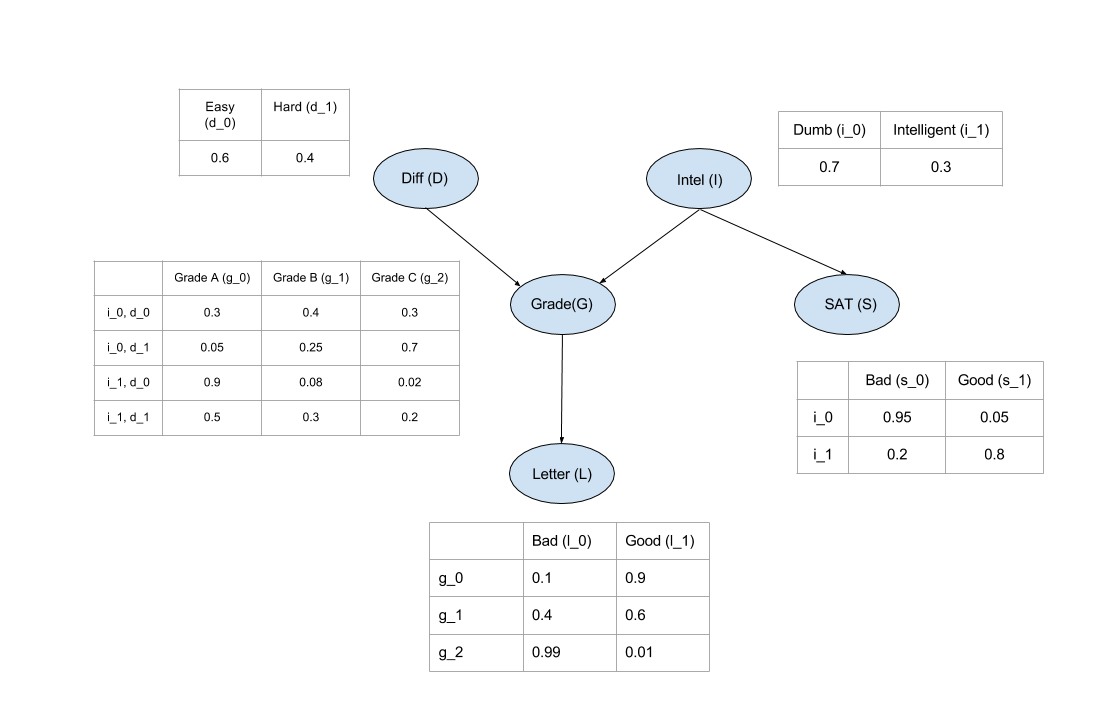

In [2]:
Image('data/student_full_param.png')

In `pgmpy` we define the network structure and the CPDs separately and then associate them with the structure. Here's an example for defining the above model:

In [2]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = DiscreteBayesianNetwork([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

# Defining individual CPDs.
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]])
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]])

print(cpd_d)
print(cpd_i)

TypeError: unsupported operand type(s) for |: 'type' and 'type'

- `TabularCPD` defines the conditional probability distribution table (CPD table)

- `variable` (int, string (any hashable python object)): The variable whose CPD is defined.
- `variable_card` (integer):  Cardinality/no. of states of variable

- `values` (2D array, 2D list or 2D tuple):  Values for the CPD table.  
       
The representation of CPD in `pgmpy` is a bit different than the CPD shown in the above picture. In `pgmpy` the colums are the __evidences__ and rows are the __states__ of the variable. So the grade CPD is represented like this:       

In [ ]:
cpd_g = TabularCPD(variable='G', variable_card=3,
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])
print(cpd_g)

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+


- `evidence` (array-like): List of variables in evidences(if any) w.r.t. which CPD is defined.

- `evidence_card` (array-like): cardinality/no. of states of variables in `evidence`(if any)

In [ ]:
cpd_l = TabularCPD(variable='L', variable_card=2,
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'],
                   evidence_card=[3])
print(cpd_l)

+------+------+------+------+
| G    | G(0) | G(1) | G(2) |
+------+------+------+------+
| L(0) | 0.1  | 0.4  | 0.99 |
+------+------+------+------+
| L(1) | 0.9  | 0.6  | 0.01 |
+------+------+------+------+


In [ ]:
cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'],
                   evidence_card=[2])
print(cpd_s)

+------+------+------+
| I    | I(0) | I(1) |
+------+------+------+
| S(0) | 0.95 | 0.2  |
+------+------+------+
| S(1) | 0.05 | 0.8  |
+------+------+------+


In [ ]:
# Associating the CPDs with the network
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

- `model.add_cpds` adds CPD (Conditional Probability Distribution) to the Bayesian Model.

- `cpds` (list, set, tuple (array-like)): List of CPDs which will be associated with the model

In [ ]:
# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly
# defined and sum to 1.
model.check_model()

True

- `check_model()`: checks the model for various errors.

- checks if the sum of the probabilities for each state is equal to 1 (tol=0.01).

- checks if the CPDs associated with nodes are consistent with their parents.

CPDs can also be defined using the state names of the variables. If the state names are not provided
like in the previous example, `pgmpy` will automatically assign names as: 0, 1, 2, ....


In [ ]:
cpd_d_sn = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]], state_names={'D': ['Easy', 'Hard']})
cpd_i_sn = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]], state_names={'I': ['Dumb', 'Intelligent']})
cpd_g_sn = TabularCPD(variable='G', variable_card=3,
                      values=[[0.3, 0.05, 0.9,  0.5],
                              [0.4, 0.25, 0.08, 0.3],
                              [0.3, 0.7,  0.02, 0.2]],
                      evidence=['I', 'D'],
                      evidence_card=[2, 2],
                      state_names={'G': ['A', 'B', 'C'],
                                   'I': ['Dumb', 'Intelligent'],
                                   'D': ['Easy', 'Hard']})

cpd_l_sn = TabularCPD(variable='L', variable_card=2,
                      values=[[0.1, 0.4, 0.99],
                              [0.9, 0.6, 0.01]],
                      evidence=['G'],
                      evidence_card=[3],
                      state_names={'L': ['Bad', 'Good'],
                                   'G': ['A', 'B', 'C']})

cpd_s_sn = TabularCPD(variable='S', variable_card=2,
                      values=[[0.95, 0.2],
                              [0.05, 0.8]],
                      evidence=['I'],
                      evidence_card=[2],
                      state_names={'S': ['Bad', 'Good'],
                                   'I': ['Dumb', 'Intelligent']})

# These defined CPDs can be added to the model. Since, the model already has CPDs associated to variables, it will
# show warning that pmgpy is now replacing those CPDs with the new ones.
model.add_cpds(cpd_d_sn, cpd_i_sn, cpd_g_sn, cpd_l_sn, cpd_s_sn)
model.check_model()

True

- `state_names` (dict (optional)) – A dict indicating, for each variable, the discrete set of states that the variable can take. If unspecified, the observed values in the data set are taken to be the only possible states.

We can now call some methods on the `BayesianModel` object.

In [ ]:
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x7a2047d335c0>,
 <TabularCPD representing P(I:2) at 0x7a1f485af7d0>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x7a1f4c1536e0>,
 <TabularCPD representing P(L:2 | G:3) at 0x7a1f48329790>,
 <TabularCPD representing P(S:2 | I:2) at 0x7a1f4cc41af0>]

- `get_cpds(node=None)` returns the `cpd` of the node. If node is not specified returns all the CPDs that have been added till now to the graph

- `node` (any hashable python object (optional)) – The node whose CPD we want. If node not specified returns all the CPDs added to the model.

- returns: a list of `TabularCPDs`

In [ ]:
# Printing a CPD with it's state names defined.
print(model.get_cpds('G'))

+------+---------+---------+----------------+----------------+
| I    | I(Dumb) | I(Dumb) | I(Intelligent) | I(Intelligent) |
+------+---------+---------+----------------+----------------+
| D    | D(Easy) | D(Hard) | D(Easy)        | D(Hard)        |
+------+---------+---------+----------------+----------------+
| G(A) | 0.3     | 0.05    | 0.9            | 0.5            |
+------+---------+---------+----------------+----------------+
| G(B) | 0.4     | 0.25    | 0.08           | 0.3            |
+------+---------+---------+----------------+----------------+
| G(C) | 0.3     | 0.7     | 0.02           | 0.2            |
+------+---------+---------+----------------+----------------+


In [ ]:
model.get_cardinality('G')

np.int64(3)

- `get_cardinality(node=None)` returns the cardinality of the node. Throws an error if the CPD for the queried node hasn’t been added to the network.

- `node` (Any hashable python object(optional).) – The node whose cardinality we want. If node is not specified returns a dictionary with the given variable as keys and their respective cardinality as values.

### 2. Independencies in Bayesian Networks



In the above two cases it is fairly obvious that change in any of the node will affect the other. For the first case we can take the example of $difficulty \rightarrow grade$. If we increase the difficulty of the course the probability of getting a higher grade decreases. For the second case we can take the example of $SAT \leftarrow Intel$. Now if we increase the probability of getting a good score in SAT that would imply that the student is intelligent, hence increasing the probability of $i_1$. Therefore in both the cases shown above any change in the variables leads to change in the other variable.

In [ ]:
# Getting the local independencies of a variable.
model.local_independencies('G')

(G ⟂ S | I, D)

In [ ]:
# Getting all the local independencies in the network.
model.local_independencies(['D', 'I', 'S', 'G', 'L'])

(D ⟂ I, S)
(I ⟂ D)
(S ⟂ G, L, D | I)
(G ⟂ S | I, D)
(L ⟂ I, S, D | G)

__Active trail__: For any two variables $A$ and $B$ in a network if any change in $A$ influences the values of $B$ then we say that there is an _active trail_ between $A$ and $B$.
In `pgmpy` `active_trail_nodes` gives a set of nodes which are affected (i.e. correlated) by any
change in the node passed in the argument.

In [ ]:
model.active_trail_nodes('D')

{'D': {'D', 'G', 'L'}}

In [ ]:
model.active_trail_nodes('D', observed='G')

{'D': {'D', 'I', 'S'}}

- `observed` (List of nodes (optional)): If given the active trail would be computed assuming these nodes to be observed.

### 3. How is this Bayesian Network representing the Joint Distribution over the variables ?
Till now we just have been considering that the Bayesian Network can represent the Joint Distribution without any proof. Now let's see how to compute the Joint Distribution from the Bayesian Network.

From the chain rule of probabiliy we know that:

$P(A, B) = P(A | B) * P(B)$

Now in this case:

$P(D, I, G, L, S) = P(L| S, G, D, I) * P(S | G, D, I) * P(G | D, I) * P(D | I) * P(I)$

Applying the local independence conditions in the above equation we will get:

$P(D, I, G, L, S) = P(L|G) * P(S|I) * P(G| D, I) * P(D) * P(I)$

From the above equation we can clearly see that the Joint Distribution over all the variables is just the product of all the CPDs in the network. Hence encoding the independencies in the Joint Distribution in a graph structure helped us in reducing the number of parameters that we need to store.

### 4. Inference in Bayesian Models
Till now we discussed just about representing Bayesian Networks. Now let's see how we can do inference in a Bayesian Model and use it to predict values over new data points for machine learning tasks. In this section we will consider that we already have our model. We will talk about constructing the models from data in later parts of this tutorial.

In inference we try to answer probability queries over the network given some other variables. So, we might want to know the probable grade of an intelligent student in a difficult class given that he scored good in SAT. So for computing these values from a Joint Distribution we will have to reduce over the given variables that is $I = 1$, $D = 1$, $S = 1$ and then marginalize over the other variables that is $L$ to get $P(G | I=1, D=1, S=1)$.
But carrying on marginalize and reduce operation on the complete Joint Distribution is computationaly expensive since we need to iterate over the whole table for each operation and the table is exponential is size to the number of variables. But in Graphical Models we exploit the independencies to break these operations in smaller parts making it much faster.

One of the very basic methods of inference in Graphical Models is __Variable Elimination__.

#### Variable Elimination
We know that:

$\mathbb{P}(D, I, G, L, S) = P(L|G) * P(S|I) * P(G|D, I) * P(D) * P(I)$

Now let's say we just want to compute the probability of G. For that we will need to marginalize over all the other variables.

$P(G) = \sum_{D, I, L, S} P(D, I, G, L, S)$

$P(G) = \sum_{D, I, L, S} P(L|G) * P(S|I) * P(G|D, I) * P(D) * P(I)$

$P(G) = \sum_D \sum_I \sum_L \sum_S P(L|G) * P(S|I) * P(G|D, I) * P(D) * P(I)$

Now since not all the conditional distributions depend on all the variables we can push the summations inside:

$P(G) = \sum_D \sum_I \sum_L \sum_S P(L|G) * P(S|I) * P(G|D, I) * P(D) * P(I)$

$P(G) = \sum_D P(D) \sum_I P(G|D, I) * P(I) \sum_S P(S|I) \sum_L P(L|G)$

$P(G) =  \sum_I P(G|D, I) * P(I) $



So, by pushing the summations inside we have saved a lot of computation because we have now to iterate over much smaller tables.

Let's take an example for inference using _Variable Elimination_ in `pgmpy`:

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
g_dist = infer.query(['G'])
print(g_dist)

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(A) |   0.3620 |
+------+----------+
| G(B) |   0.2884 |
+------+----------+
| G(C) |   0.3496 |
+------+----------+


There can be cases in which we want to compute the conditional distribution let's say $P(G | D=0, I=1)$. In such cases we need to modify our equations a bit:

$P(G | D=0, I=1) = \sum_L \sum_S P(L|G) * P(S| I=1) * P(G| D=0, I=1) * P(D=0) * P(I=1)$

$P(G | D=0, I=1) = P(D=0) * P(I=1) * P(G | D=0, I=1) * \sum_L P(L | G) * \sum_S P(S | I=1)$

In `pgmpy` we will just need to pass an extra argument in the case of conditional distributions:

In [ ]:
print(infer.query(['G'], evidence={'D': 'Easy', 'I': 'Intelligent'}))

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(A) |   0.9000 |
+------+----------+
| G(B) |   0.0800 |
+------+----------+
| G(C) |   0.0200 |
+------+----------+


####  Predicting values from new data points
Predicting values from new data points is quite similar to computing the conditional probabilities. We need to query for the variable that we need to predict given all the other features. The only difference is that rather than getting the probabilitiy distribution we are interested in getting the most probable state of the variable.

In pgmpy this is known as MAP query. Here's an example:

In [ ]:
infer.map_query(['G'])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

{'G': 'A'}

In [ ]:
infer.map_query(['G'], evidence={'D': 'Easy', 'I': 'Intelligent'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'G': 'A'}

In [ ]:
infer.map_query(['G'], evidence={'D': 'Easy', 'I': 'Intelligent', 'L': 'Good', 'S': 'Good'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'G': 'A'}

### 5. Other methods for Inference
Even though exact inference algorithms like Variable Elimination optimize the inference task, it is still computationally quite expensive in the case of large models. For such cases we can use approximate algorithms like Message Passing Algorithms, Sampling Algorithms etc. We will talk about a few other exact and approximate algorithms in later parts of the tutorial.

# Learning Bayesian Networks from Data


Previous notebooks showed how Bayesian networks economically encode a probability distribution over a set of variables, and how they can be used e.g. _to predict variable states. This section will be about obtaining a Bayesian network, given a set of sample data_. Learning a Bayesian network can be split into two problems:

 **Parameter learning:** Given a set of data samples and a DAG that captures the dependencies between the variables, estimate the (conditional) probability distributions of the individual variables.

 **Structure learning:** Given a set of data samples, estimate a DAG that captures the dependencies between the variables.

This notebook aims to illustrate how parameter learning can be done with `pgmpy`.
Currently, the library supports:
 - Parameter learning for *discrete* nodes:
   - Maximum Likelihood Estimation
   - Bayesian Estimation with Smoothing
   - Expectation Maximization (EM)


## 1. Maximum Likelihood Estimation

Suppose we have the following data:

In [3]:
import pandas as pd
data = pd.DataFrame(data={'fruit': ["banana", "apple", "banana", "apple", "banana","apple", "banana",
                                    "apple", "apple", "apple", "banana", "banana", "apple", "banana",],
                          'tasty': ["yes", "no", "yes", "yes", "yes", "yes", "yes",
                                    "yes", "yes", "yes", "yes", "no", "no", "no"],
                          'size': ["large", "large", "large", "small", "large", "large", "large",
                                    "small", "large", "large", "large", "large", "small", "small"]})
print(data)

     fruit tasty   size
0   banana   yes  large
1    apple    no  large
2   banana   yes  large
3    apple   yes  small
4   banana   yes  large
5    apple   yes  large
6   banana   yes  large
7    apple   yes  small
8    apple   yes  large
9    apple   yes  large
10  banana   yes  large
11  banana    no  large
12   apple    no  small
13  banana    no  small


We know that the variables relate as follows:

In [4]:
!pip install pgmpy
from pgmpy.models import DiscreteBayesianNetwork

model = DiscreteBayesianNetwork([('fruit', 'tasty'), ('size', 'tasty')])  # fruit -> tasty <- size

TypeError: unsupported operand type(s) for |: 'type' and 'type'

Parameter learning is the task to estimate the values of the conditional probability distributions (CPDs), for the variables `fruit`, `size`, and `tasty`.

#### State counts
To make sense of the given data, we can start by counting how often each state of the variable occurs. If the variable is dependent on parents, the counts are done conditionally on the parents states, i.e. separately for each parent configuration:

In [17]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model, data)
print("\n", pe.state_counts('fruit'))  # unconditional
print("\n", pe.state_counts('tasty'))  # conditional on fruit and size


         count
fruit        
apple       7
banana      7

 fruit apple       banana      
size  large small  large small
tasty                         
no      1.0   1.0    1.0   1.0
yes     3.0   2.0    5.0   0.0


We can see, for example, that as many apples as bananas were observed and that `5` large bananas were tasty, while only `1` was not.

#### Maximum Likelihood Estimation

A natural estimate for the CPDs is to simply use the *relative frequencies*, with which the variable states have occured. We observed `7 apples` among a total of `14 fruits`, so we might guess that about `50%` of `fruits` are `apples`.

This approach is *Maximum Likelihood Estimation (MLE)*. According to MLE, we should fill the CPDs in such a way, that $P(\text{data}|\text{model})$ is maximal. This is achieved when using the *relative frequencies*. See [1], section 17.1 for an introduction to ML parameter estimation. `pgmpy` supports MLE as follows:

In [18]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model, data)
print(mle.estimate_cpd('fruit'))  # unconditional
print(mle.estimate_cpd('tasty'))  # conditional

+---------------+-----+
| fruit(apple)  | 0.5 |
+---------------+-----+
| fruit(banana) | 0.5 |
+---------------+-----+
+------------+--------------+-----+---------------+
| fruit      | fruit(apple) | ... | fruit(banana) |
+------------+--------------+-----+---------------+
| size       | size(large)  | ... | size(small)   |
+------------+--------------+-----+---------------+
| tasty(no)  | 0.25         | ... | 1.0           |
+------------+--------------+-----+---------------+
| tasty(yes) | 0.75         | ... | 0.0           |
+------------+--------------+-----+---------------+


- `mle.estimate_cpd(variable)` computes the state counts and divides each cell by the (conditional) sample size.
- The `mle.get_parameters()`-method returns a list of CPDs for all variables of the model.

- The built-in `fit()`-method of `BayesianNetwork` provides more convenient access to parameter estimators:


In [19]:
# Calibrate all CPDs of `model` using MLE:
model.fit(data, estimator=MaximumLikelihoodEstimator)


While very straightforward, the ML estimator has the problem of *overfitting* to the data. In above CPD, the probability of a large banana being tasty is estimated at `0.833`, because `5` out of `6` observed large bananas were tasty. Fine. But note that the probability of a small banana being tasty is estimated at `0.0`, because we  observed only one small banana and it happened to be not tasty. But that should hardly make us certain that small bananas aren't tasty!
We simply do not have enough observations to rely on the observed frequencies. If the observed data is not representative for the underlying distribution, ML estimations will be extremly far off.

When estimating parameters for Bayesian networks, lack of data is a frequent problem. Even if the total sample size is very large, the fact that state counts are done conditionally for each parents configuration causes immense fragmentation. If a variable has 3 parents that can each take 10 states, then state counts will be done separately for `10^3 = 1000` parents configurations. This makes MLE very fragile and unstable for learning Bayesian Network parameters. A way to mitigate MLE's overfitting is *Bayesian Parameter Estimation*.

## 2. Bayesian Parameter Estimation with Smoothing

The Bayesian Parameter Estimator starts with already existing prior CPDs, that express our beliefs about the variables *before* the data was observed. Those "priors" are then updated, using the state counts from the observed data. See [1], Section 17.3 for a general introduction to Bayesian estimators.

One can think of the priors as consisting in *pseudo state counts*, that are added to the actual counts before normalization.
Unless one wants to encode specific beliefs about the distributions of the variables, one commonly chooses uniform priors, i.e. ones that deem all states equiprobable.

A very simple prior is the so-called `K2` prior (_Laplace smoothing_), which simply adds `1` to the count of every single state.
A somewhat more sensible choice of prior is `BDeu` (Bayesian Dirichlet equivalent uniform prior). For `BDeu` we need to specify an _equivalent sample size_ `N` and then the pseudo-counts are the equivalent of having observed `N` uniform samples of each variable (and each parent configuration). In `pgmpy`:




In [20]:
from pgmpy.estimators import BayesianEstimator
est = BayesianEstimator(model, data)

print(est.estimate_cpd('tasty', prior_type='BDeu', equivalent_sample_size=10))

+------------+---------------------+-----+---------------------+
| fruit      | fruit(apple)        | ... | fruit(banana)       |
+------------+---------------------+-----+---------------------+
| size       | size(large)         | ... | size(small)         |
+------------+---------------------+-----+---------------------+
| tasty(no)  | 0.34615384615384615 | ... | 0.6428571428571429  |
+------------+---------------------+-----+---------------------+
| tasty(yes) | 0.6538461538461539  | ... | 0.35714285714285715 |
+------------+---------------------+-----+---------------------+


The estimated values in the CPDs are now more conservative. In particular, the estimate for a small banana being not tasty is now around `0.64` rather than `1.0`. Setting `equivalent_sample_size` to `10` means that for each parent configuration, we add the equivalent of 10 uniform samples (here: `+5` small bananas that are tasty and `+5` that aren't).

`BayesianEstimator`, too, can be used via the `fit()`-method. Full example:

In [21]:
import numpy as np
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator

# generate data
data = pd.DataFrame(np.random.randint(low=0, high=2, size=(5000, 4)), columns=['A', 'B', 'C', 'D'])
model = DiscreteBayesianNetwork([('A', 'B'), ('A', 'C'), ('D', 'C'), ('B', 'D')])

model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5
for cpd in model.get_cpds():
    print(cpd)


+------+--------+
| A(0) | 0.4996 |
+------+--------+
| A(1) | 0.5004 |
+------+--------+
+------+---------------------+---------------------+
| A    | A(0)                | A(1)                |
+------+---------------------+---------------------+
| B(0) | 0.49400119976004797 | 0.49720503094430024 |
+------+---------------------+---------------------+
| B(1) | 0.505998800239952   | 0.5027949690556998  |
+------+---------------------+---------------------+
+------+--------------------+-----+---------------------+
| A    | A(0)               | ... | A(1)                |
+------+--------------------+-----+---------------------+
| D    | D(0)               | ... | D(1)                |
+------+--------------------+-----+---------------------+
| C(0) | 0.4927841250751654 | ... | 0.47896473499690656 |
+------+--------------------+-----+---------------------+
| C(1) | 0.5072158749248347 | ... | 0.5210352650030934  |
+------+--------------------+-----+---------------------+
+------+---------

## 3. Expection Maximization (EM) Algorithm

For this example, we simulate some data from the [alarm model](https://www.bnlearn.com/bnrepository/discrete-medium.html#alarm) and use it to learn back the model parameters. In this example, we simply use the structure to the _alarm model_.

In [22]:
from pgmpy.utils import get_example_model
from pgmpy.models import DiscreteBayesianNetwork

# Load the alarm model and simulate data from it.
alarm_model = get_example_model(model="alarm")
samples = alarm_model.simulate(n_samples=int(1e3))

print(samples.head())

# Define a new model with the same structure as the alarm model.
new_model = DiscreteBayesianNetwork(ebunch=alarm_model.edges())

  0%|          | 0/37 [00:00<?, ?it/s]

  LVEDVOLUME   PVSAT VENTMACH    FIO2   PRESS    PCWP VENTLUNG CATECHOL  \
0     NORMAL     LOW   NORMAL  NORMAL    HIGH  NORMAL     ZERO     HIGH   
1     NORMAL  NORMAL   NORMAL     LOW  NORMAL  NORMAL      LOW   NORMAL   
2     NORMAL     LOW   NORMAL  NORMAL    HIGH  NORMAL   NORMAL   NORMAL   
3     NORMAL     LOW   NORMAL  NORMAL    HIGH  NORMAL     ZERO     HIGH   
4       HIGH  NORMAL   NORMAL  NORMAL    HIGH    HIGH     ZERO     HIGH   

      PAP STROKEVOLUME  ... VENTTUBE VENTALV INTUBATION ANAPHYLAXIS LVFAILURE  \
0  NORMAL       NORMAL  ...      LOW    ZERO     NORMAL       FALSE     FALSE   
1  NORMAL       NORMAL  ...     HIGH    HIGH     NORMAL       FALSE     FALSE   
2  NORMAL       NORMAL  ...     ZERO  NORMAL     NORMAL       FALSE     FALSE   
3  NORMAL       NORMAL  ...      LOW    ZERO     NORMAL       FALSE     FALSE   
4  NORMAL       NORMAL  ...      LOW    ZERO     NORMAL       FALSE     FALSE   

  HISTORY     TPR   SHUNT MINVOL      BP  
0   FALSE  NORMAL  

The _Expectation Maximization_ (EM) estimator can work in the case when latent variables are present in the model. To simulate this scenario, we will specify some of the variables in our `new_model` as latents and drop those variables from samples to simulate missing data.

In [23]:
model_latent = DiscreteBayesianNetwork(alarm_model.edges(), latents={'HISTORY', 'CVP'})
samples_latent = samples.drop(['HISTORY', 'CVP'], axis=1)

In [24]:
from pgmpy.estimators import ExpectationMaximization as EM
em_est = EM(model=model_latent, data=samples_latent)
# Generate HTML table for each CPD
#em_est.get_parameters()
# Initialize the EM estimator
em_est = EM(model=model_latent, data=samples_latent)

# Iterate through CPDs generated by the model
for cpd in em_est.get_parameters():
    print(f"Conditional Probability Distribution for {cpd.variable}:")
    print(cpd)

  0%|          | 0/100 [00:00<?, ?it/s]

Conditional Probability Distribution for LVEDVOLUME:
+--------------------+-----+-------------------+
| HYPOVOLEMIA        | ... | HYPOVOLEMIA(TRUE) |
+--------------------+-----+-------------------+
| LVFAILURE          | ... | LVFAILURE(TRUE)   |
+--------------------+-----+-------------------+
| LVEDVOLUME(HIGH)   | ... | 0.0               |
+--------------------+-----+-------------------+
| LVEDVOLUME(LOW)    | ... | 1.0               |
+--------------------+-----+-------------------+
| LVEDVOLUME(NORMAL) | ... | 0.0               |
+--------------------+-----+-------------------+
Conditional Probability Distribution for PVSAT:
+---------------+-----+----------------------+
| FIO2          | ... | FIO2(NORMAL)         |
+---------------+-----+----------------------+
| VENTALV       | ... | VENTALV(ZERO)        |
+---------------+-----+----------------------+
| PVSAT(HIGH)   | ... | 0.0                  |
+---------------+-----+----------------------+
| PVSAT(LOW)    | ... | 0.99541